# Crime Rate Prediction Using Linear Regression
This dataset reflects arrest incidents in the City of Los Angeles dating back to 2010. This data is transcribed from original arrest reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0.0000°, 0.0000°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database. Please note questions or concerns in the comments. 
The dataset is available at [data.lacity.org](https://data.lacity.org/A-Safe-City/Arrest-Data-from-2010-to-Present/yru6-6re4). It contains about 1.31 million records.


In [6]:
import pandas as pd
import datetime as dt

data = pd.read_csv("Dataset/Arrest_Data_from_2010_to_Present.csv"); 
data['Arrest Date'] = data['Arrest Date'].astype('datetime64[ns]'); #Convert date to datetime object
pd.set_option('display.max_columns', None); #set pandas to print all columns as opposed to truncating
print(data.info()); 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310127 entries, 0 to 1310126
Data columns (total 17 columns):
Report ID                   1310127 non-null int64
Arrest Date                 1310127 non-null datetime64[ns]
Time                        1309932 non-null float64
Area ID                     1310127 non-null int64
Area Name                   1310127 non-null object
Reporting District          1310127 non-null int64
Age                         1310127 non-null int64
Sex Code                    1310127 non-null object
Descent Code                1310127 non-null object
Charge Group Code           1222098 non-null float64
Charge Group Description    1221577 non-null object
Arrest Type Code            1310127 non-null object
Charge                      1310127 non-null object
Charge Description          1222140 non-null object
Address                     1310127 non-null object
Cross Street                747661 non-null object
Location                    1310127 non-null objec

For this analysis, data for 2019 is excluded as it reflects an incomplete year. 

In [7]:
# Delete data past Jan 1, 2019
dataset = data[data['Arrest Date'].dt.year != 2019]

**Analyze 2018 Data**

In [22]:
#1.0 Find total Crimes in 2018
B2018 = dataset[dataset['Arrest Date'].dt.year == 2018]
crimes2018 = B2018['Arrest Date'].count() 
print("Number of crimes in 2018: %d" % crimes2018); 

# 2.0 Crime by areas
print(B2018['Area Name'].groupby(B2018['Area Name']).count().reset_index(name='count').sort_values(['count'], ascending=False))


Number of crimes in 2018: 104277
      Area Name  count
1       Central  10951
6     Hollywood   9715
13      Rampart   7345
12      Pacific   6778
0   77th Street   6259
17     Van Nuys   6193
15    Southwest   5927
9        Newton   5427
8   N Hollywood   4947
7       Mission   4357
11      Olympic   3898
4        Harbor   3875
14    Southeast   3601
5    Hollenbeck   3590
19  West Valley   3562
10    Northeast   3452
2    Devonshire   3146
16      Topanga   3094
3      Foothill   3006
18      West LA   2687
20     Wilshire   2467


**Linear Regression Using Scikitlearn Python Library**

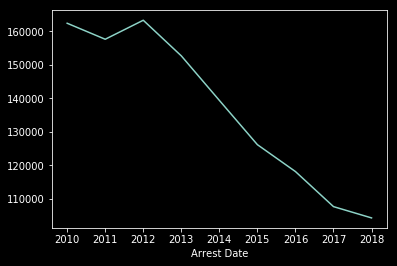

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

num_crimes = dataset['Arrest Date'].groupby(dataset['Arrest Date'].dt.year).count()
num_crimes.plot(); plt.show()

**Perform Linear fitting**

In [25]:
years = num_crimes.keys(); X = np.array(years).reshape(-1, 1)
count = num_crimes.values
reg = LinearRegression().fit(X.reshape(-1, 1), count)
predicted_crimes = reg.predict([[2019]])
print("Number of crimes predicted for 2019 using Linear Estimation: %.0f" % predicted_crimes[0])

Number of crimes predicted for 2019 using Linear Estimation: 95230


**Count crimes within an area**  
Here, attempt to find the number of crimes within 2km from ***Bradbury Building (34.050536, -118.247861).*** In order to accomplish this, we use the spherical earth distance formula discussed [here](https://en.wikipedia.org/wiki/Geographical_distance#Spherical_Earth_projected_to_a_plane) with R = 6371km

In [27]:
# Location work - within 2km
import re
from math import sqrt, pi, cos

def get_dist_from_Building(x):
    R = 6371; c = (34.050536, -118.247861); #c is location of Bradbury Building 
    dphi = (c[0] - x[0])*pi/180.0;
    d_lamda = (c[1] - x[1])*pi/180.0;
    phi_m = (c[0] - x[0])*pi/(180.0* 2.0)
    return R * sqrt((dphi*dphi) + (cos(phi_m)*d_lamda)**2)

L = dataset[(dataset['Location'] != '(0.0, 0.0)') & (dataset['Arrest Date'].dt.year == 2018)]
lat_lon_re = re.compile(r'\((.*),\ (.*)\)')
L['Lat_Lng'] = [tuple(map(float,lat_lon_re.findall(p)[0])) for p in L['Location']]
L['dist'] = list(get_dist_from_Building(x) for x in L['Lat_Lng'])
count_crimes = L[(L['dist'] <= 2.0)].count()['Arrest Date'];
print("Number of arrest incidents within 2km from the Bradbury Building in 2018: %.0f" % count_crimes)


C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
Number of arrest incidents within 2km from the Bradbury Building in 2018: 10883
C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
